In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

train_path = os.path.join(base_dir, "data", "train.csv")
df_train = pd.read_csv(train_path)

test_path = os.path.join(base_dir, "data", "test.csv")
df_test = pd.read_csv(test_path)


In [3]:
submission_path=os.path.join(base_dir, "data", "sample_submission.csv")
df_target=pd.read_csv(submission_path)


In [4]:
df_target['Depression'].value_counts()

Depression
No    101
Name: count, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 401 non-null    object 
 1   Age                                    401 non-null    int64  
 2   Academic Pressure                      401 non-null    float64
 3   Study Satisfaction                     401 non-null    float64
 4   Sleep Duration                         401 non-null    object 
 5   Dietary Habits                         401 non-null    object 
 6   Have you ever had suicidal thoughts ?  401 non-null    object 
 7   Study Hours                            401 non-null    int64  
 8   Financial Stress                       401 non-null    int64  
 9   Family History of Mental Illness       401 non-null    object 
 10  Depression                             401 non-null    object 
 11  index 

In [6]:
df_train['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    93
2.0    81
5.0    80
3.0    79
1.0    68
Name: count, dtype: int64

In [7]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


In [8]:
df_train.shape

(401, 12)

In [9]:
df_train.select_dtypes('number').columns

Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress', 'index'],
      dtype='object')

In [10]:
df_train.select_dtypes('object').columns

Index(['Gender', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [11]:
df_train.describe(include='number')

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress,index
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,26.281796,3.000000,3.089776,6.351621,2.927681,245.122195
std,4.852102,1.371131,1.380913,3.734107,1.416777,145.237848
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000,121.000000
50%,27.000000,3.000000,3.000000,6.000000,3.000000,243.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000,370.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000,501.000000


In [12]:
df_train.describe(include='object')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,401,401,401,401,401,401
unique,2,4,3,2,2,2
top,Male,More than 8 hours,Unhealthy,Yes,No,Yes
freq,209,107,135,208,216,201


In [13]:
df_train.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'index'],
      dtype='object')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 401 non-null    object 
 1   Age                                    401 non-null    int64  
 2   Academic Pressure                      401 non-null    float64
 3   Study Satisfaction                     401 non-null    float64
 4   Sleep Duration                         401 non-null    object 
 5   Dietary Habits                         401 non-null    object 
 6   Have you ever had suicidal thoughts ?  401 non-null    object 
 7   Study Hours                            401 non-null    int64  
 8   Financial Stress                       401 non-null    int64  
 9   Family History of Mental Illness       401 non-null    object 
 10  Depression                             401 non-null    object 
 11  index 

In [15]:
df_train.isnull().sum()


Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
index                                    0
dtype: int64

In [16]:
df_train.nunique()


Gender                                     2
Age                                       17
Academic Pressure                          5
Study Satisfaction                         5
Sleep Duration                             4
Dietary Habits                             3
Have you ever had suicidal thoughts ?      2
Study Hours                               13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
index                                    401
dtype: int64

In [17]:
df_train.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [18]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


Gender

In [19]:
df_train['Gender'].value_counts()

Gender
Male      209
Female    192
Name: count, dtype: int64

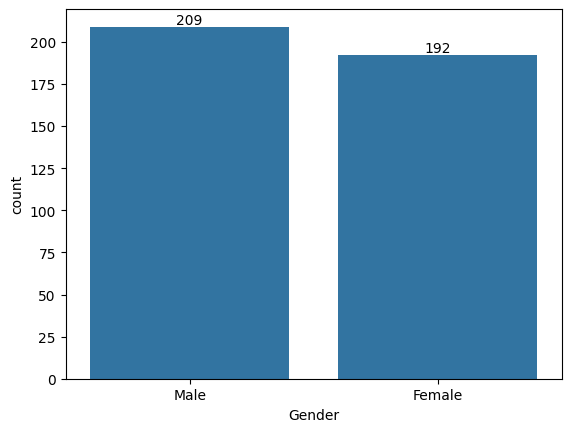

In [20]:
ax=sns.countplot(x=df_train['Gender'])
for bars in ax.containers:
    ax.bar_label(bars)


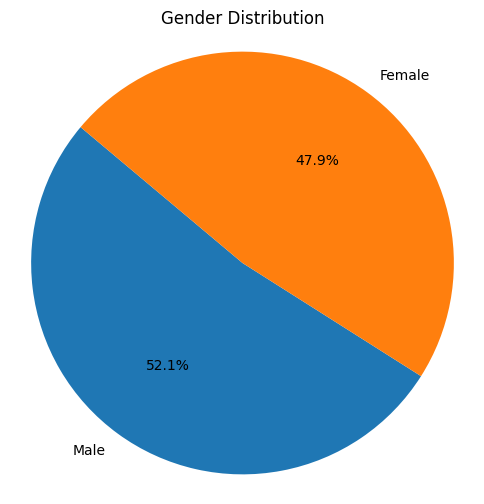

In [21]:
import matplotlib.pyplot as plt

gender_counts = df_train['Gender'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()


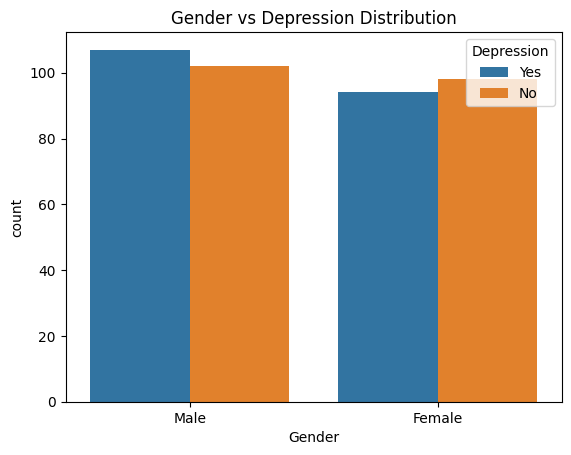

In [22]:
sns.countplot(data=df_train, x='Gender', hue='Depression')
plt.title('Gender vs Depression Distribution')
plt.show()


In [23]:
pd.crosstab(df_train['Gender'], df_train['Depression'], normalize='index') * 100


Depression,No,Yes
Gender,,
Female,51.041667,48.958333
Male,48.803828,51.196172


In [24]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_train['Gender'], df_train['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 0.12093701042856829
P-value: 0.728020439894806


✅ Conclusion:

There is no statistically significant relationship between Gender and Depression in this dataset.
In other words, the distribution of Depression is similar across genders.



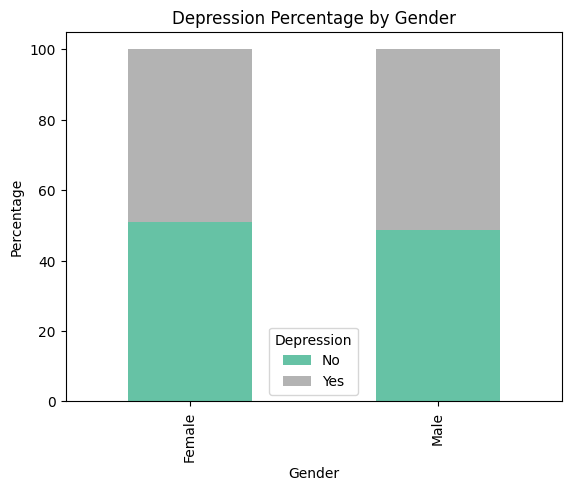

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

norm_ct = pd.crosstab(df_train['Gender'], df_train['Depression'], normalize='index') * 100
norm_ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.ylabel('Percentage')
plt.title('Depression Percentage by Gender')
plt.legend(title='Depression')
plt.show()


<Axes: xlabel='Gender', ylabel='Academic Pressure'>

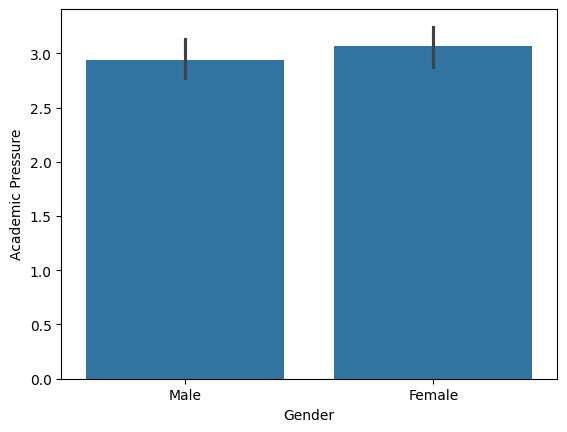

In [26]:
sns.barplot(data=df_train,x='Gender',y='Academic Pressure')

Depression

In [27]:
df_train['Depression'].value_counts()

Depression
Yes    201
No     200
Name: count, dtype: int64

<Axes: xlabel='Depression', ylabel='count'>

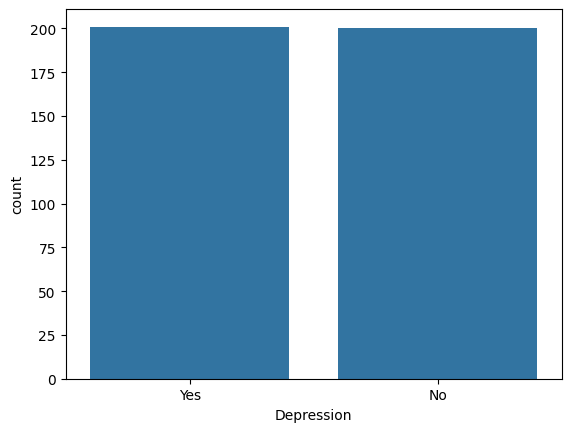

In [28]:
sns.countplot(x=df_train['Depression'])

In [29]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


Age

In [30]:
df_train['Age'].describe()

count    401.000000
mean      26.281796
std        4.852102
min       18.000000
25%       22.000000
50%       27.000000
75%       30.000000
max       34.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

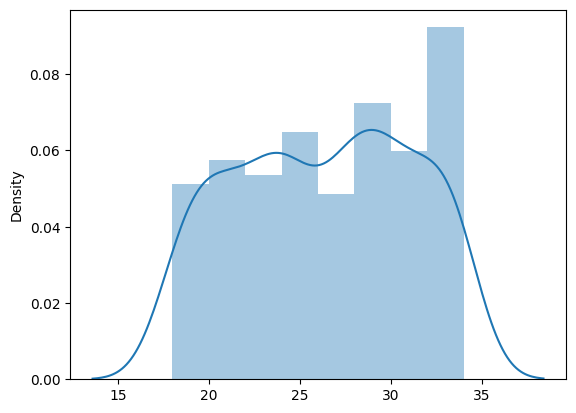

In [31]:
sns.distplot(x=df_train['Age'])

<Axes: xlabel='Age'>

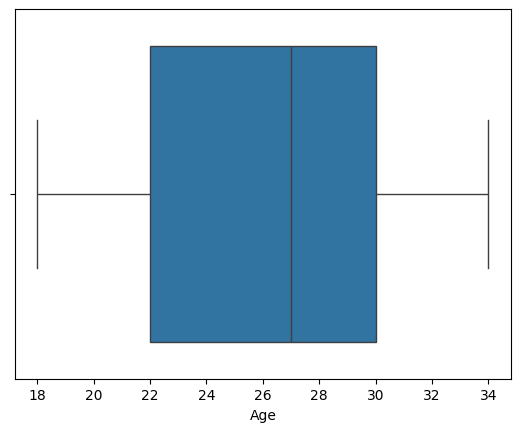

In [32]:
sns.boxplot(x=df_train['Age'])

<Axes: xlabel='Age', ylabel='Count'>

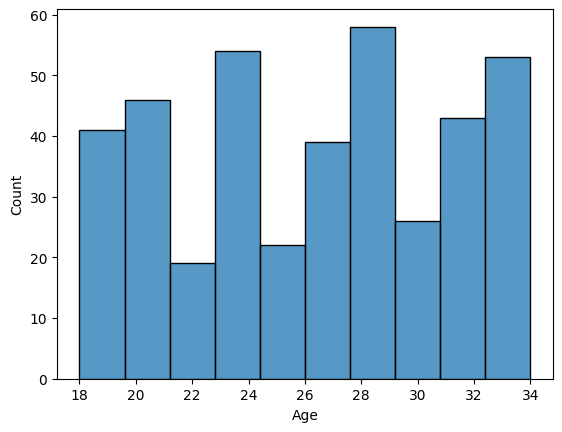

In [33]:
sns.histplot(x=df_train['Age'])

<Axes: xlabel='Depression', ylabel='Age'>

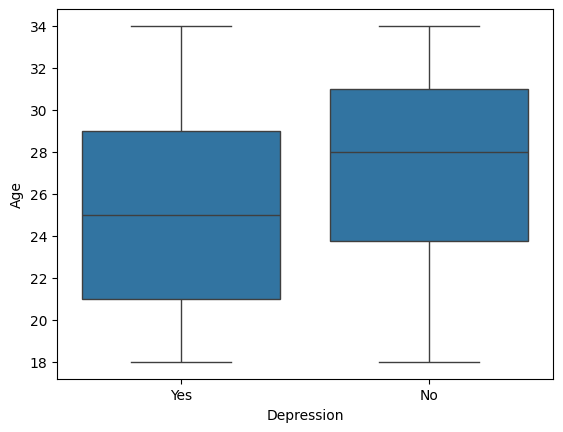

In [34]:
sns.boxplot(x=df_train['Depression'],y=df_train['Age'])

<Axes: xlabel='Depression', ylabel='Age'>

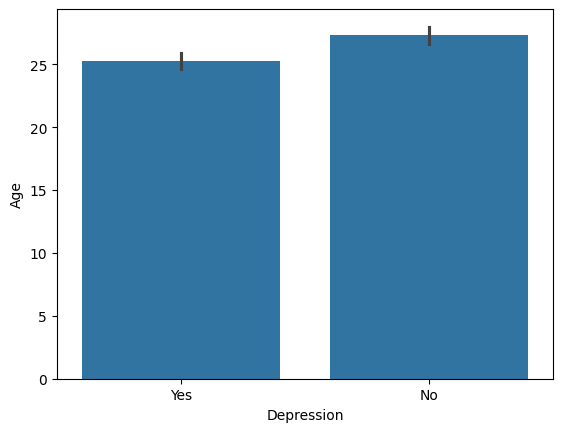

In [35]:
sns.barplot(x=df_train['Depression'],y=df_train['Age'])

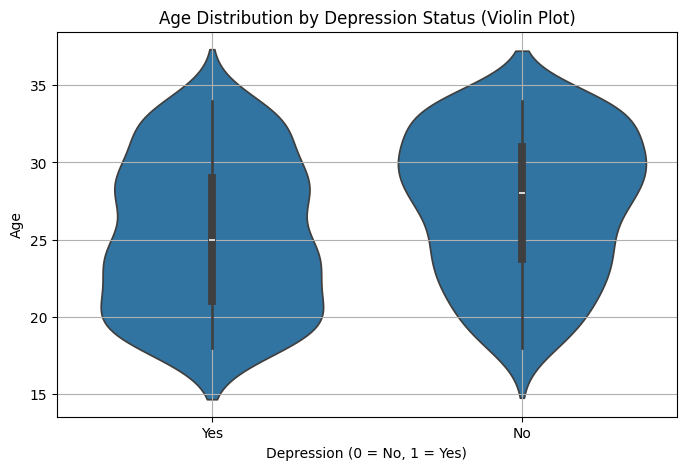

In [36]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Depression', y='Age', data=df_train)
plt.title('Age Distribution by Depression Status (Violin Plot)')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()


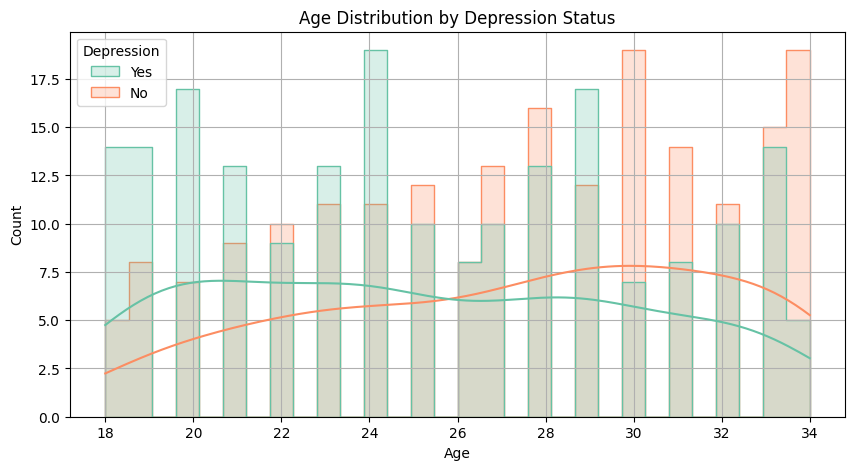

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='Age', hue='Depression', kde=True, bins=30, palette='Set2', element='step')
plt.title('Age Distribution by Depression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [38]:
df_train['Depression'].value_counts()

Depression
Yes    201
No     200
Name: count, dtype: int64

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro


# Separate the two groups
age_0 = df_train[df_train['Depression'] == 'Yes']['Age']
age_1 = df_train[df_train['Depression'] == 'No']['Age']

# Check normality with Shapiro-Wilk test (suitable for small to moderate sample sizes)
shapiro_0 = shapiro(age_0)
shapiro_1 = shapiro(age_1)

print("Shapiro-Wilk Normality Test Results:")
print(f"Group 0 (No Depression): p = {shapiro_0.pvalue:.4f}")
print(f"Group 1 (Depression):    p = {shapiro_1.pvalue:.4f}")

# Define normality thresholds
alpha = 0.05
normal_0 = shapiro_0.pvalue > alpha
normal_1 = shapiro_1.pvalue > alpha

# Choose test based on normality
if normal_0 and normal_1:
    # Use t-test
    t_stat, p_val = ttest_ind(age_0, age_1, equal_var=False)
    test_used = "T-test"
else:
    # Use Mann-Whitney U Test
    u_stat, p_val = mannwhitneyu(age_0, age_1, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

# Output results
print(f"\nStatistical Test Used: {test_used}")
print(f"P-value = {p_val:.4e}")

if p_val < alpha:
    print("✅ Statistically significant difference in age between groups.")
else:
    print("❌ No statistically significant difference in age between groups.")


Shapiro-Wilk Normality Test Results:
Group 0 (No Depression): p = 0.0000
Group 1 (Depression):    p = 0.0000

Statistical Test Used: Mann-Whitney U Test
P-value = 2.8195e-05
✅ Statistically significant difference in age between groups.


<Axes: xlabel='Depression', ylabel='Age'>

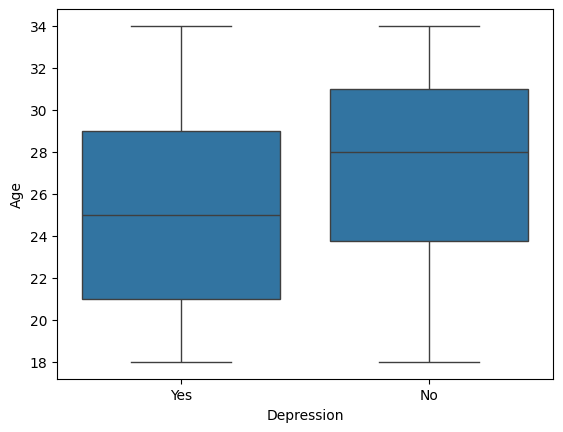

In [40]:
sns.boxplot(x='Depression', y='Age', data=df_train)


In [41]:
print(df_train.groupby('Depression')['Age'].median())
print(df_train.groupby('Depression')['Age'].mean())


Depression
No     28.0
Yes    25.0
Name: Age, dtype: float64
Depression
No     27.300000
Yes    25.268657
Name: Age, dtype: float64


📌 Conclusion

1. 🧠 Age and Depression

Statistical Test Used: Mann-Whitney U Test (due to non-normality in both groups)

P-value: 2.82e-05 (significant at α = 0.05)

Median Age:

Depressed group: 25.0 years

Non-depressed group: 28.0 years

Mean Age:

Depressed: 25.27

Non-depressed: 27.30

Conclusion:

There is a statistically significant difference in age between individuals with and without depression.

People with depression tend to be younger than those without depression.

This suggests that younger individuals in the dataset are more likely to report depression.

2. 🚻 Gender and Depression

Chi-square Test P-value: 0.728 (not significant)

Depression rates by gender:

Female: ~49% depressed

Male: ~51% depressed

Conclusion:

There is no statistically significant association between gender and depression in this dataset.

Depression appears to be evenly distributed across males and females.

🎯 Overall Insight

Age is an important factor associated with depression in this dataset.

Gender does not significantly affect depression prevalence.

Targeted mental health interventions may be more necessary for younger individuals, regardless of gender.



In [42]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


Academic Pressure

In [43]:
df_train['Academic Pressure'].value_counts()

Academic Pressure
3.0    102
1.0     76
5.0     75
4.0     75
2.0     73
Name: count, dtype: int64

<Axes: xlabel='Academic Pressure', ylabel='count'>

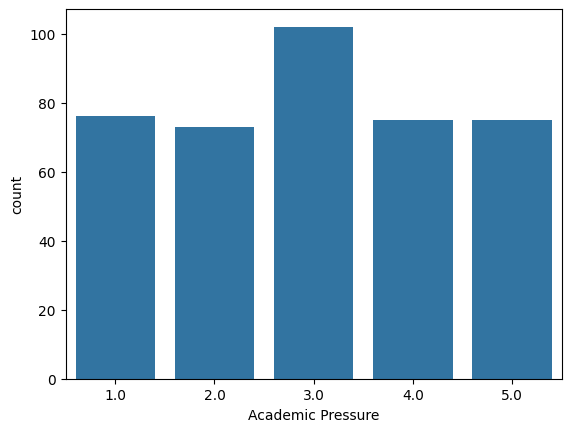

In [44]:
sns.countplot(x=df_train['Academic Pressure'])

In [45]:
ct = pd.crosstab(df_train['Academic Pressure'], df_train['Depression'])
print(ct)


Depression         No  Yes
Academic Pressure         
1.0                63   13
2.0                50   23
3.0                50   52
4.0                26   49
5.0                11   64


In [46]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Academic Pressure and Depression.")
else:
    print("❌ No significant association between Academic Pressure and Depression.")


Chi-square statistic: 87.4250
P-value: 4.6381e-18
✅ Significant association between Academic Pressure and Depression.


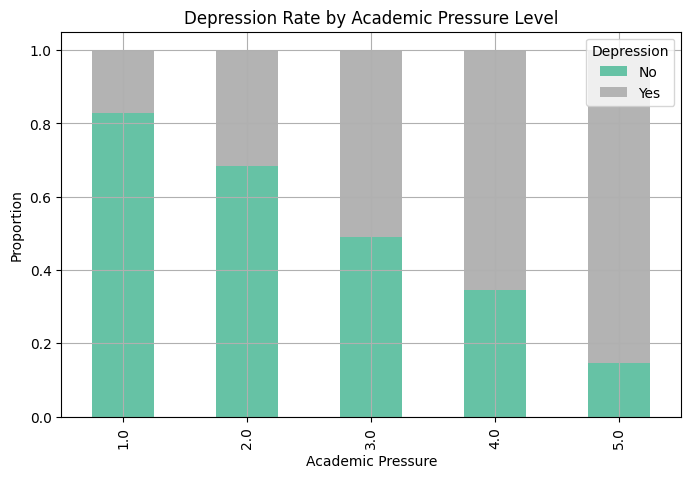

In [47]:
# Normalized count (percent per group)
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Depression Rate by Academic Pressure Level')
plt.xlabel('Academic Pressure')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


 Statistically Significant Relationship
 
There is a very strong statistical association between levels of academic pressure and depression status.

This means depression rates are not equally distributed across different academic pressure levels.



 Implication for Mental Health Interventions
 
Students under greater academic stress are at greater risk for depression.

Institutions (schools, universities) should:

Monitor and manage academic workloads

Provide mental health support services

Create pressure-mitigation strategies (e.g., time management training, flexible deadlines)




There is a strong and significant association between academic pressure and depression. Higher academic pressure is linked to significantly higher rates of depression, suggesting academic stress is a key risk factor for mental health concerns in this population.



In [48]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,No,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,Yes,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,Yes,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,No,428


study satisfaction

<Axes: xlabel='Study Satisfaction', ylabel='count'>

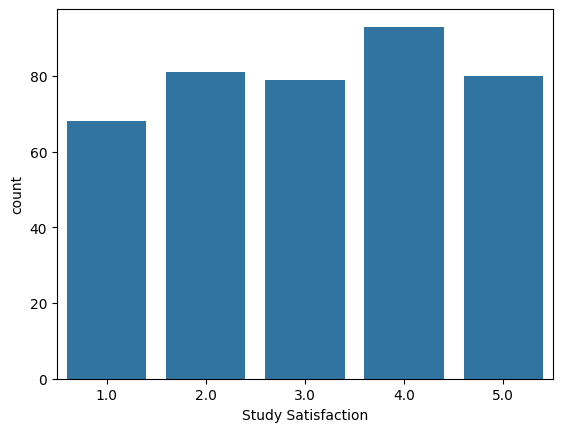

In [49]:
sns.countplot(x=df_train['Study Satisfaction'])

In [50]:
ct = pd.crosstab(df_train['Study Satisfaction'], df_train['Depression'])
print(ct)


Depression          No  Yes
Study Satisfaction         
1.0                 17   51
2.0                 33   48
3.0                 38   41
4.0                 56   37
5.0                 56   24


In [51]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Study Satisfaction and Depression.")
else:
    print("❌ No significant association between Study Satisfaction and Depression.")


Chi-square statistic: 36.5712
P-value: 2.2075e-07
✅ Significant association between Study Satisfaction and Depression.


In [52]:
df_train['Depression']=df_train['Depression'].map({'Yes':1,'No':0})

Study Satisfaction
1.0    0.750000
2.0    0.592593
3.0    0.518987
4.0    0.397849
5.0    0.300000
Name: Depression, dtype: float64


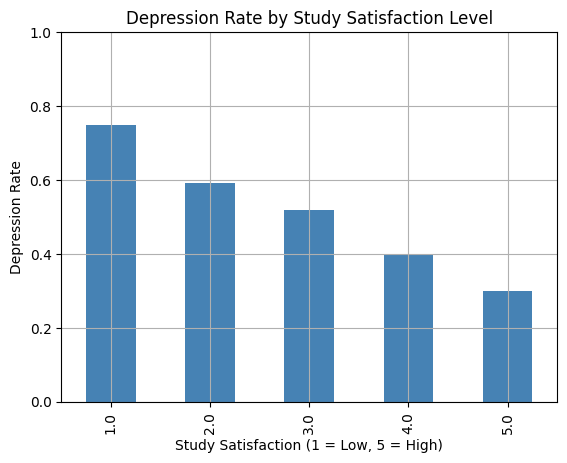

In [53]:
rate_by_satisfaction = df_train.groupby('Study Satisfaction')['Depression'].mean()
print(rate_by_satisfaction)

# Bar plot
rate_by_satisfaction.plot(kind='bar', color='steelblue')
plt.title('Depression Rate by Study Satisfaction Level')
plt.xlabel('Study Satisfaction (1 = Low, 5 = High)')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


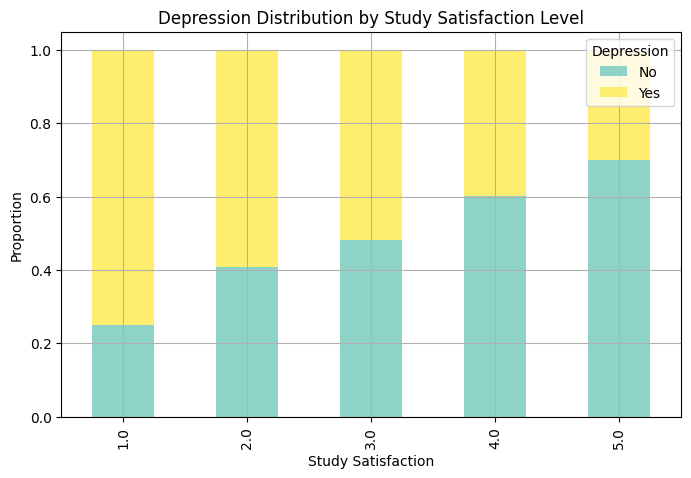

In [54]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Set3', figsize=(8, 5))
plt.title('Depression Distribution by Study Satisfaction Level')
plt.xlabel('Study Satisfaction')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


🧠 Conclusion

There is a strong and statistically significant association between study satisfaction and depression. Students with lower satisfaction are far more likely to be depressed, while those with higher satisfaction show lower depression rates. Improving study satisfaction could be an important strategy for enhancing student mental health.

Dietary Habits

In [55]:
df_train['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    135
Healthy      133
Moderate     133
Name: count, dtype: int64

<Axes: xlabel='Dietary Habits', ylabel='count'>

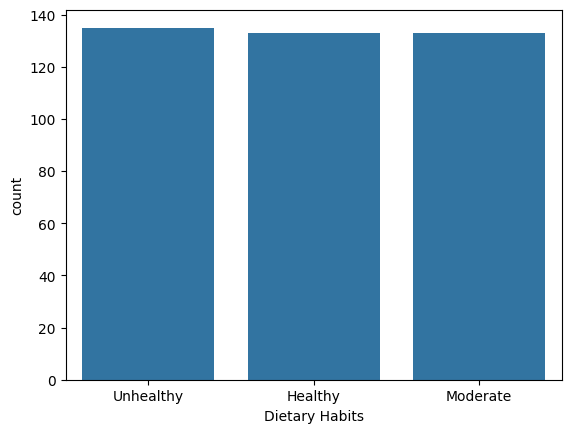

In [56]:
sns.countplot(x=df_train['Dietary Habits'])

In [57]:
ct = pd.crosstab(df_train['Dietary Habits'], df_train['Depression'])
print(ct)


Depression       0   1
Dietary Habits        
Healthy         85  48
Moderate        64  69
Unhealthy       51  84


In [58]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Dietary Habits and Depression.")
else:
    print("❌ No significant association between Dietary Habits and Depression.")


Chi-square statistic: 18.5455
P-value: 9.3950e-05
✅ Significant association between Dietary Habits and Depression.


Dietary Habits
Healthy      0.360902
Moderate     0.518797
Unhealthy    0.622222
Name: Depression, dtype: float64


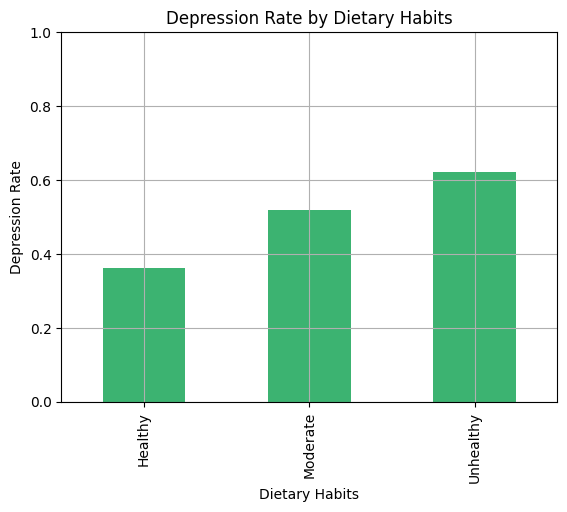

In [59]:
rate_by_diet = df_train.groupby('Dietary Habits')['Depression'].mean()
print(rate_by_diet)

# Plot
rate_by_diet.plot(kind='bar', color='mediumseagreen')
plt.title('Depression Rate by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


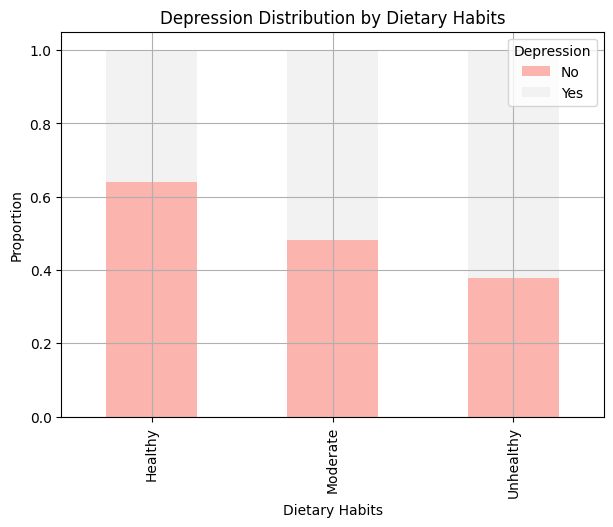

In [60]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


🧠 Key Insights

Clear Positive Trend:

Depression rate increases from healthy to unhealthy diets.

Healthy eaters have the lowest depression rate, while those with unhealthy diets have the highest.

Diet Quality Appears Protective:

Healthy diets may be linked with better mental health, possibly due to nutritional benefits like stabilized mood, brain function, and energy regulation.

Potential for Interventions:

Programs promoting nutritious eating habits among students could help reduce depression risk.

Mental health and dietary support should be integrated in student wellness initiatives.

📌 Conclusion

There is a strong and statistically significant association between dietary habits and depression. Students with unhealthy diets show a much higher likelihood of depression, whereas those with healthy eating patterns report significantly lower depression rates. Improving dietary quality may be an important and actionable target for mental health interventions.



In [61]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0,428


In [62]:
X=df_train[['Age','Academic Pressure','Study Satisfaction']]
y=df_train['Depression']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
coefficients = lr.coef_
feature_names = X_train.columns

feature_importance = pd.DataFrame(coefficients.T, index=feature_names, columns=["Coefficient"])

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by="Absolute Coefficient", ascending=False)

print(feature_importance_sorted)


                    Coefficient  Absolute Coefficient
Academic Pressure      0.980697              0.980697
Study Satisfaction    -0.522922              0.522922
Age                   -0.154183              0.154183


In [66]:
lr.coef_

array([[-0.15418329,  0.9806968 , -0.52292213]])

In [67]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0,428


Sleep Duration

In [68]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
More than 8 hours    107
Less than 5 hours    100
7-8 hours             99
5-6 hours             95
Name: count, dtype: int64

In [69]:
ct = pd.crosstab(df_train['Sleep Duration'], df_train['Depression'])
print(ct)


Depression          0   1
Sleep Duration           
5-6 hours          47  48
7-8 hours          47  52
Less than 5 hours  48  52
More than 8 hours  58  49


In [70]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Sleep Duration and Depression.")
else:
    print("❌ No significant association between Sleep Duration and Depression.")


Chi-square statistic: 1.1776
P-value: 7.5839e-01
❌ No significant association between Sleep Duration and Depression.


Sleep Duration
5-6 hours            0.505263
7-8 hours            0.525253
Less than 5 hours    0.520000
More than 8 hours    0.457944
Name: Depression, dtype: float64


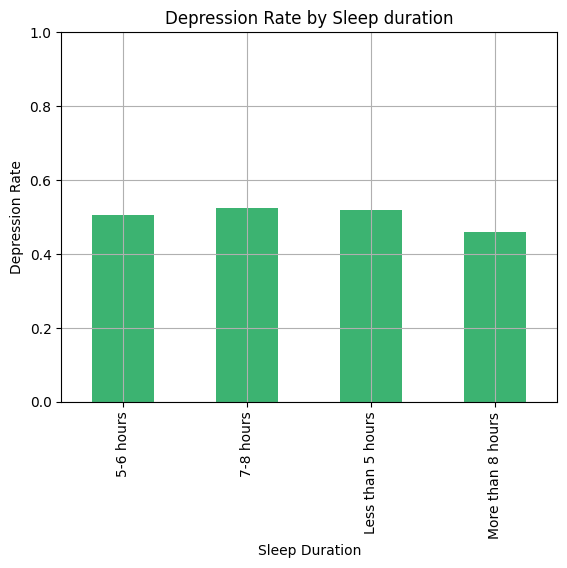

In [71]:
rate_by_diet = df_train.groupby('Sleep Duration')['Depression'].mean()
print(rate_by_diet)

# Plot
rate_by_diet.plot(kind='bar', color='mediumseagreen')
plt.title('Depression Rate by Sleep duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


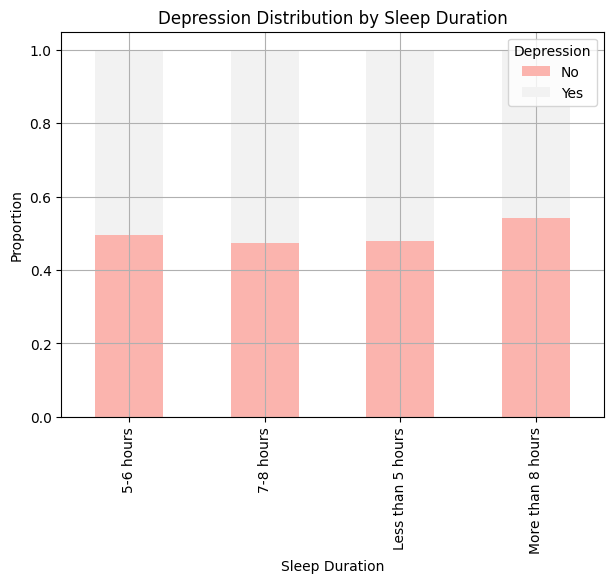

In [72]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


📊 Conclusion:

There is no statistically significant association between sleep duration and depression based on the data presented.

✅ Chi-square statistic: 1.18

✅ P-value: 0.758

❌ Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.

🔍 This means that any differences observed in depression levels across sleep durations are likely due to chance and not statistically meaningful.

📌 Interpretation:
Even though there are slight differences in proportions (e.g., more than 8 hours of sleep seems to have a slightly lower proportion of depression), these differences are not strong enough to indicate a real association in the population.



In [73]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0,428


<Axes: xlabel='Academic Pressure', ylabel='Study Satisfaction'>

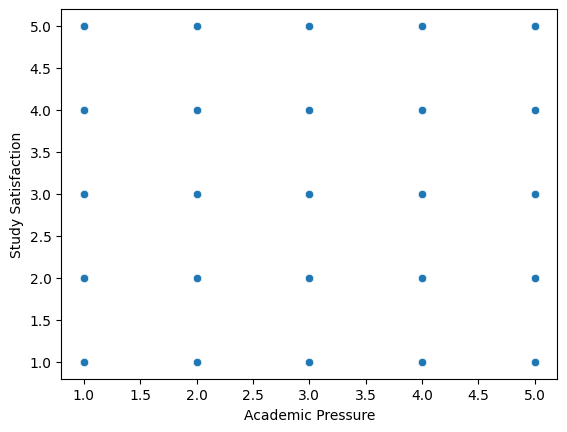

In [74]:
sns.scatterplot(x='Academic Pressure',y='Study Satisfaction',data=df_train)

In [75]:
df_train['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    208
No     193
Name: count, dtype: int64

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

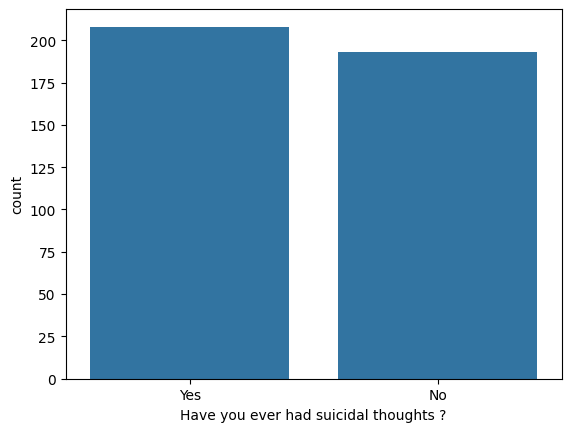

In [76]:
sns.countplot(x=df_train['Have you ever had suicidal thoughts ?'])

In [77]:
ct = pd.crosstab(df_train['Have you ever had suicidal thoughts ?'], df_train['Depression'])
print(ct)


Depression                               0    1
Have you ever had suicidal thoughts ?          
No                                     143   50
Yes                                     57  151


In [78]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between suicidal thoughts and Depression.")
else:
    print("❌ No significant association between suicidal thoughts and Depression.")


Chi-square statistic: 85.4347
P-value: 2.3948e-20
✅ Significant association between suicidal thoughts and Depression.


Have you ever had suicidal thoughts ?
No     0.259067
Yes    0.725962
Name: Depression, dtype: float64


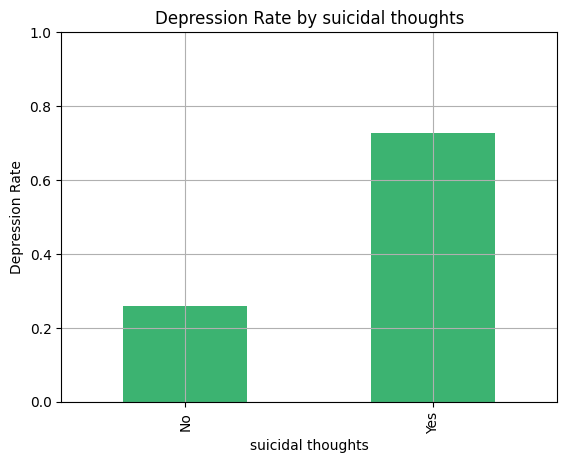

In [79]:
rate_by_diet = df_train.groupby('Have you ever had suicidal thoughts ?')['Depression'].mean()
print(rate_by_diet)

# Plot
rate_by_diet.plot(kind='bar', color='mediumseagreen')
plt.title('Depression Rate by suicidal thoughts')
plt.xlabel('suicidal thoughts')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


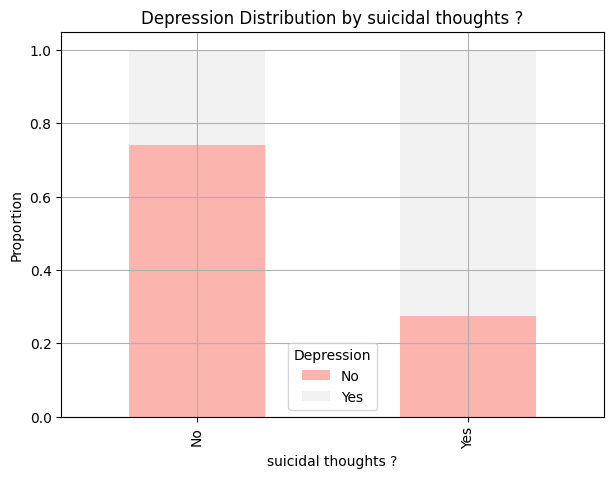

In [80]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by suicidal thoughts ?')
plt.xlabel('suicidal thoughts ?')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


Conclusion:

There is a statistically significant association between depression and suicidal thoughts (χ² = 85.43, p < 0.001). This extremely low p-value (2.39e-20) strongly indicates that the relationship is not due to chance.

The plot supports this by showing that:

Among individuals with no suicidal thoughts, a majority do not have depression.

Among those with suicidal thoughts, a majority have depression.

In [81]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1,146
...,...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0,112
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1,466
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1,301
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0,428


In [82]:
df_train['Financial Stress'].value_counts()

Financial Stress
2    87
1    85
4    78
3    76
5    75
Name: count, dtype: int64

<Axes: xlabel='Financial Stress', ylabel='count'>

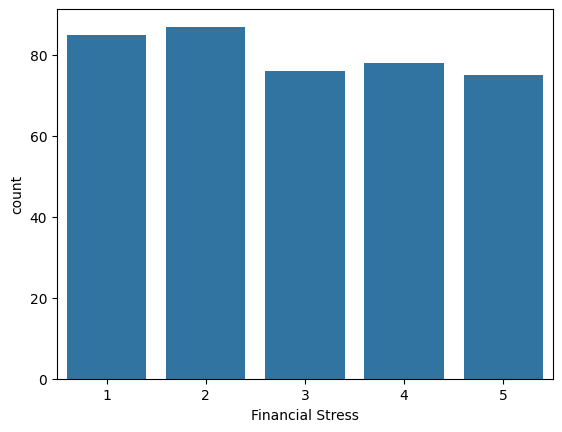

In [83]:
sns.countplot(x=df_train['Financial Stress'])

In [84]:
ct = pd.crosstab(df_train['Financial Stress'], df_train['Depression'])
print(ct)


Depression         0   1
Financial Stress        
1                 61  24
2                 51  36
3                 36  40
4                 31  47
5                 21  54


In [85]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Finalcial Stress and Depression.")
else:
    print("❌ No significant association between Financial Stress and Depression.")


Chi-square statistic: 36.7024
P-value: 2.0744e-07
✅ Significant association between Finalcial Stress and Depression.


Financial Stress
1    0.282353
2    0.413793
3    0.526316
4    0.602564
5    0.720000
Name: Depression, dtype: float64


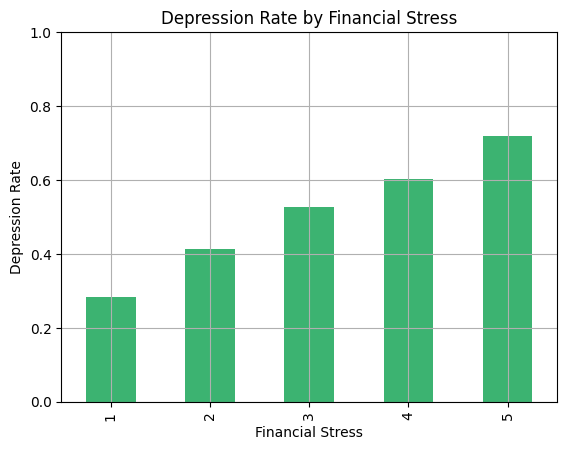

In [86]:
rate_by_diet = df_train.groupby('Financial Stress')['Depression'].mean()
print(rate_by_diet)

# Plot
rate_by_diet.plot(kind='bar', color='mediumseagreen')
plt.title('Depression Rate by Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

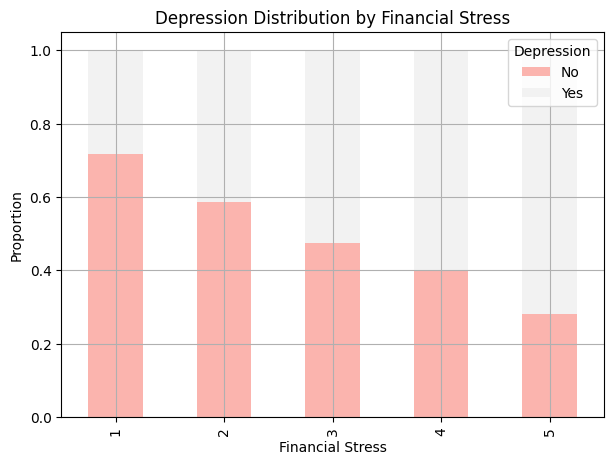

In [87]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


<Axes: xlabel='Study Hours', ylabel='count'>

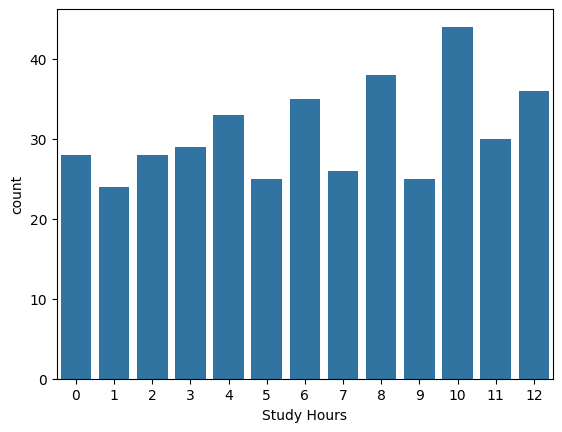

In [88]:
sns.countplot(x=df_train['Study Hours'])

In [89]:
ct = pd.crosstab(df_train['Study Hours'], df_train['Depression'])
print(ct)

from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Study Hours and Depression.")
else:
    print("❌ No significant association between Study Hours and Depression.")


Depression    0   1
Study Hours        
0            21   7
1            16   8
2            17  11
3            20   9
4            19  14
5             9  16
6            12  23
7            13  13
8            15  23
9            13  12
10           19  25
11           11  19
12           15  21
Chi-square statistic: 26.9729
P-value: 7.7969e-03
✅ Significant association between Study Hours and Depression.


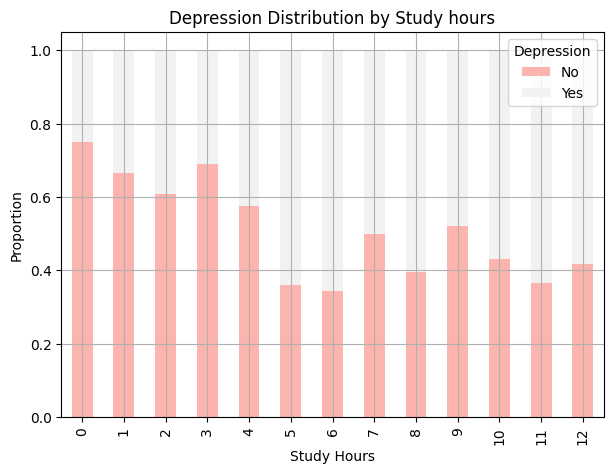

In [90]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by Study hours')
plt.xlabel('Study Hours')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

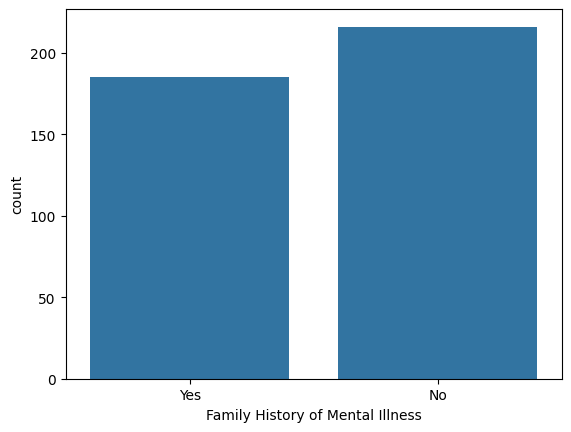

In [91]:
sns.countplot(x=df_train['Family History of Mental Illness'])

In [92]:
ct = pd.crosstab(df_train['Family History of Mental Illness'], df_train['Depression'])
print(ct)

from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("✅ Significant association between Family History of Mental Illness' and Depression.")
else:
    print("❌ No significant association between Family History of Mental Illness' and Depression.")


Depression                          0    1
Family History of Mental Illness          
No                                112  104
Yes                                88   97
Chi-square statistic: 0.5703
P-value: 4.5014e-01
❌ No significant association between Family History of Mental Illness' and Depression.


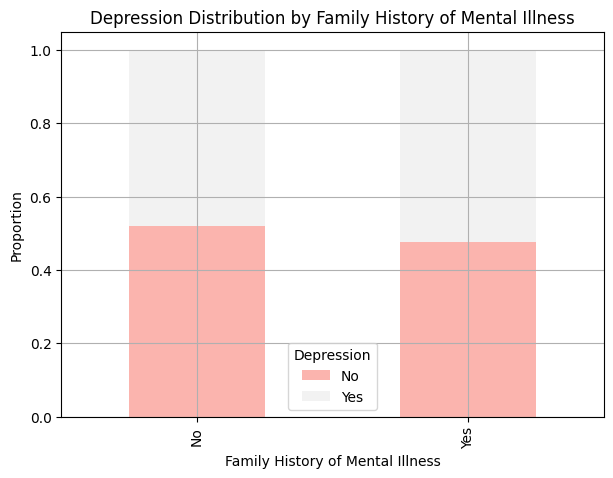

In [93]:
normalized_ct = ct.div(ct.sum(axis=1), axis=0)

normalized_ct.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(7, 5))
plt.title('Depression Distribution by Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


Family History of Mental Illness
No     0.481481
Yes    0.524324
Name: Depression, dtype: float64


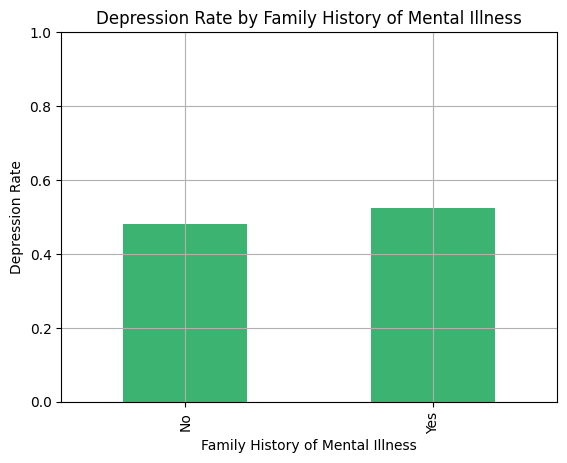

In [94]:
rate_by_diet = df_train.groupby('Family History of Mental Illness')['Depression'].mean()
print(rate_by_diet)

# Plot
rate_by_diet.plot(kind='bar', color='mediumseagreen')
plt.title('Depression Rate by Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Depression Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [95]:
df_train.drop('index',axis=1,inplace=True)

In [96]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0


In [97]:
df_train.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [98]:
df_train['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    135
Healthy      133
Moderate     133
Name: count, dtype: int64

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Load your dataset
# Updated list of ordinal features and their order
ordinal_features = ['Dietary Habits', 'Sleep Duration']
ordinal_categories = [
    ['Unhealthy', 'Moderate', 'Healthy'],  # for Dietary Habits
    ['Less than 5 hours', '5-6 hours', '6-7 hours', '7-8 hours', 'More than 8 hours']  # for Sleep Duration
]

nominal_features = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numeric_features = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0))
])

X = df_train.drop('Depression', axis=1)
y = df_train['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
print(f"Test Accuracy: {pipeline.score(X_test, y_test):.4f}")



Test Accuracy: 0.9877


In [100]:
X

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes
...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No


In [101]:
pipeline.predict(df_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Define features and target
X = df_train.drop('Depression', axis=1)
y = df_train['Depression']

# Define column groups
ordinal_features = ['Dietary Habits', 'Sleep Duration']
ordinal_categories = [
    ['Unhealthy', 'Moderate', 'Healthy'],
    ['Less than 5 hours', '5-6 hours', '6-7 hours', '7-8 hours', 'More than 8 hours']
]

nominal_features = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numeric_features = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

# Preprocessing: ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 1.0000
Decision Tree Accuracy: 0.9012
Random Forest Accuracy: 0.9753


In [103]:
df_train

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,1
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,1
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,0
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,0
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
396,Female,21,1.0,4.0,7-8 hours,Healthy,No,8,5,Yes,0
397,Female,20,3.0,4.0,More than 8 hours,Unhealthy,Yes,3,4,Yes,1
398,Female,32,4.0,3.0,Less than 5 hours,Healthy,Yes,11,4,No,1
399,Female,27,3.0,4.0,5-6 hours,Healthy,No,0,2,No,0


In [111]:
df_test['index'].min()

np.int64(1)

In [105]:
preds=pipeline.predict(df_test)

In [108]:
preds = pipeline.predict(df_test)

submission = pd.DataFrame({
    'id': df_test['index'],  
    'prediction': preds
})

submission.to_csv('submission.csv', index=False)


In [109]:
# Make predictions
preds = pipeline.predict(df_test)

# Check if we have 101 rows
if len(preds) == 101:
    # Create a DataFrame for submission
    submission = pd.DataFrame({
        'id': range(1, 102),  # Assuming 'id' is a sequential number from 1 to 101
        'prediction': preds
    })

    # Save to CSV
    submission.to_csv('submission.csv', index=False)
else:
    print("Error: Predictions do not contain exactly 101 rows.")


In [114]:
# Make predictions
preds = pipeline.predict(df_test)

# Check if the number of rows in predictions is 101
if len(preds) == 101:
    # Create a DataFrame for submission using the existing 'index' column as 'id'
    submission = pd.DataFrame({
        'index': df_test['index'],  # Use the 'index' column directly
        'prediction': preds
    })

    # Save to CSV
    submission.to_csv('submission.csv', index=False)
else:
    print("Error: Predictions do not contain exactly 101 rows.")
